In [8]:
!python -m pip install --upgrade pip


                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
      

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    pip from https://files.pythonhosted.org/packages/b7/3f/945ef7ab14dc4f9d7f40288d2df998d1837ee0888ec3659c813487572faa/pip-25.2-py3-none-any.whl:
        Expected sha256 6d67a2b4e7f14d8b31b8b52648866fa717f45a1eb70e83002f4331d07e953717
             Got        0efaa7eee364aebd181a3d43f2e79ed8f850e7d8207fa8b74cfc7324046692e6


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install --no-cache-dir selenium




                                              0.0/9.6 MB ? eta -:--:--
                                              0.0/9.6 MB ? eta -:--:--
                                              0.0/9.6 MB ? eta -:--:--
                                              0.1/9.6 MB 3.2 MB/s eta 0:00:03
                                              0.1/9.6 MB 3.2 MB/s eta 0:00:03
                                              0.1/9.6 MB 655.4 kB/s eta 0:00:15
                                              0.1/9.6 MB 726.2 kB/s eta 0:00:14
                                              0.1/9.6 MB 514.3 kB/s eta 0:00:19
                                              0.1/9.6 MB 514.3 kB/s eta 0:00:19
                                              0.1/9.6 MB 514.3 kB/s eta 0:00:19
                                              0.1/9.6 MB 426.7 kB/s eta 0:00:23
                                              0.2/9.6 MB 392.8 kB/s eta 0:00:25
                                              0.2/9.6 MB 392.8 kB/s eta


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


 # Scraping Data From Rozee.com

In [10]:
import selenium
print("Selenium version:", selenium.__version__)

Selenium version: 4.35.0


In [18]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

# apna path set karo
service = Service("C:/Users/PMLS/Downloads/chromedriver-win64/chromedriver-win64/chromedriver.exe")
driver = webdriver.Chrome(service=service)

driver.get("https://www.google.com")
print("Page Title:", driver.title)

driver.quit()



Page Title: Google


In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

# Chrome Driver Path
CHROMEDRIVER_PATH = "C:/Users/PMLS/Downloads/chromedriver-win64/chromedriver-win64/chromedriver.exe"

def start_driver():
    service = Service(CHROMEDRIVER_PATH)
    return webdriver.Chrome(service=service)

# 50 Job Titles
keywords = [
    "Software Engineer","Registered Nurse","Marketing Manager","Elementary School Teacher",
    "Financial Analyst","Graphic Designer","Police Officer","Chef","Civil Engineer",
    "Sales Representative","Pharmacist","Human Resources Manager","Electrician","Journalist",
    "Physical Therapist","Accountant","Veterinarian","Construction Worker","Lawyer",
    "Data Scientist","Flight Attendant","Real Estate Agent","Mechanic","Social Worker",
    "Photographer","Project Manager","Dentist","Truck Driver","Interior Designer",
    "Customer Service Representative","Surgeon","Web Developer","Firefighter","Bank Teller",
    "Event Planner","Pilot","Librarian","Carpenter","Psychologist","Restaurant Manager",
    "IT Support Specialist","Hair Stylist","Insurance Agent","Translator","Security Guard",
    "Personal Trainer","Court Reporter","Environmental Scientist","Travel Agent",
    "Quality Control Inspector","AI Engineer","Machine Learning Specialist","AI Engineer","AI Developer","AI Expert","AI Automation Agent","Web Developer","PHP / Laravel Developer","C++ Developer",".NET Developer","Full Stack Developer","Android Developer","Data","AI","Deep Learning", "network", "security","business analyst", "system analyst"
]

all_jobs = []

driver = start_driver()  # start first browser

for keyword in keywords:
    print(f"🔍 Scraping jobs for: {keyword}")
    for page in range(1, 3):  # har keyword ke 2 pages
        try:
            url = f"https://www.rozee.pk/job/jsearch/q/{keyword}?page={page}"
            driver.get(url)
            time.sleep(4)

            soup = BeautifulSoup(driver.page_source, "html.parser")
            job_cards = soup.find_all("div", class_="job")

            for job in job_cards:
                title = job.find("h3", class_="s-18").get_text(strip=True) if job.find("h3", class_="s-18") else ""
                company_block = job.find("div", class_="cname")
                company = company_block.get_text(" ", strip=True) if company_block else ""

                date_span = job.find("span", {"data-original-title": "Posted On"})
                date_posted = date_span.get_text(strip=True) if date_span else ""

                salary_icon = job.find("i", class_="sal rz-salary")
                salary = salary_icon.find_next("span").get_text(strip=True) if salary_icon else ""

                exp = job.find("span", {"data-original-title": "Experience"})
                exp = exp.get_text(strip=True) if exp else ""

                skills_block = job.find("div", class_="jcnt")
                skills = ", ".join([s.get_text(strip=True) for s in skills_block.find_all("span")]) if skills_block else ""

                desc_block = job.find("div", class_="jbody")
                desc = desc_block.get_text(strip=True) if desc_block else ""

                all_jobs.append({
                    "Keyword": keyword,
                    "Job Title": title,
                    "Company": company,
                    "Date Posted": date_posted,
                    "Salary": salary,
                    "Experience": exp,
                    "Skills": skills,
                    "Description": desc
                })

        except Exception as e:
            print(f"⚠️ Error on keyword '{keyword}' page {page}: {e}")
            #  Restart driver if browser crashed
            try:
                driver.quit()
            except:
                pass
            driver = start_driver()
            continue

#  Save Data
df = pd.DataFrame(all_jobs)
df.to_csv("rozee_jobs_full.csv", index=False, encoding="utf-8-sig")

print(f"✅ Scraping complete! Extracted {len(df)} jobs")
driver.quit()


🔍 Scraping jobs for: Software Engineer
🔍 Scraping jobs for: Registered Nurse
🔍 Scraping jobs for: Marketing Manager
🔍 Scraping jobs for: Elementary School Teacher
🔍 Scraping jobs for: Financial Analyst
🔍 Scraping jobs for: Graphic Designer
🔍 Scraping jobs for: Police Officer
🔍 Scraping jobs for: Chef
🔍 Scraping jobs for: Civil Engineer
🔍 Scraping jobs for: Sales Representative
🔍 Scraping jobs for: Pharmacist
🔍 Scraping jobs for: Human Resources Manager
🔍 Scraping jobs for: Electrician
🔍 Scraping jobs for: Journalist
🔍 Scraping jobs for: Physical Therapist
🔍 Scraping jobs for: Accountant
🔍 Scraping jobs for: Veterinarian
🔍 Scraping jobs for: Construction Worker
🔍 Scraping jobs for: Lawyer
🔍 Scraping jobs for: Data Scientist
🔍 Scraping jobs for: Flight Attendant
🔍 Scraping jobs for: Real Estate Agent
🔍 Scraping jobs for: Mechanic
🔍 Scraping jobs for: Social Worker
🔍 Scraping jobs for: Photographer
🔍 Scraping jobs for: Project Manager
🔍 Scraping jobs for: Dentist
🔍 Scraping jobs for: Truc

# Load data

In [ ]:
import pandas as pd 

In [5]:
jd=pd.read_csv("rozee_jobs_full.csv")

In [6]:
jd.head()

,Keyword,Job Title,Company,Date Posted,Salary,Experience,Skills,Description
0,Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleanning 

In [7]:
jd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Keyword      2511 non-null   object
 1   Job Title    1836 non-null   object
 2   Company      1836 non-null   object
 3   Date Posted  1824 non-null   object
 4   Salary       821 non-null    object
 5   Experience   1824 non-null   object
 6   Skills       1712 non-null   object
 7   Description  1836 non-null   object
dtypes: object(8)
memory usage: 157.1+ KB


In [9]:
jd.describe()

,Keyword,Job Title,Company,Date Posted,Salary,Experience,Skills,Description
count,2511,1836,1836,1824,821,1824,1712,1836
unique,66,466,666,33,107,12,744,775
top,Web Developer,AI Engineer,"Careem, Lahore , Pakistan","Aug 20, 2025",40K - 40K,2 Years,"Artificial Intelligence Knowledge, Natural Lan...",We require fresh and experienced females and m...
freq,104,62,71,93,72,954,9,16


# Select Required Columns 

In [10]:
columns_to_keep = ['Job Title', 'Company', 'Skills', 'Date Posted']
required_data=jd[columns_to_keep].copy()
required_data.columns = required_data.columns.str.lower().str.replace(' ', '_')
required_data.head()

,job_title,company,skills,date_posted
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


# Drop Rows In which  all columns are empty

In [11]:
required_data= required_data.dropna(how='all')


In [12]:
required_data.head()

,job_title,company,skills,date_posted
5,Software Engineer,"HyTech Solutions, Multiple Cities , Pakistan","PostgreSQL, Django, Vue.js","Sep 02, 2025"
6,Software Engineer - Intern,"Zixel Technology, Islamabad , Pakistan","Git, Problem Solving, CPLUSPLUS","Aug 27, 2025"
7,Software Engineer - SQL Database,"The Shams Group, All Cities , Pakistan","HTML, Data Management, .Net Framework, Softwar...","Sep 03, 2025"
8,Software Engineer,"CNC Software Pvt Ltd, Kasur , Pakistan","LINUX, Shell Scripting, API, Python","Aug 20, 2025"
9,Software Engineer,"The Shams Group, All Cities , Pakistan","MOSFETs, MVC, .NET, Windows Server OS, Office ...","Sep 03, 2025"


# Fill Null Rows of skill column with Not Specfied

In [13]:
required_data["skills"]=required_data["skills"].fillna("Not Specified")

In [ ]:
required_data.head()

,job_title,company,skills,date_posted
5,Software Engineer,"HyTech Solutions, Multiple Cities , Pakistan","PostgreSQL, Django, Vue.js","Sep 02, 2025"
6,Software Engineer - Intern,"Zixel Technology, Islamabad , Pakistan","Git, Problem Solving, CPLUSPLUS","Aug 27, 2025"
7,Software Engineer - SQL Database,"The Shams Group, All Cities , Pakistan","HTML, Data Management, .Net Framework, Softwar...","Sep 03, 2025"
8,Software Engineer,"CNC Software Pvt Ltd, Kasur , Pakistan","LINUX, Shell Scripting, API, Python","Aug 20, 2025"
9,Software Engineer,"The Shams Group, All Cities , Pakistan","MOSFETs, MVC, .NET, Windows Server OS, Office ...","Sep 03, 2025"


In [18]:
required_data.shape

(1824, 4)

In [17]:
required_data=required_data.dropna(subset=["date_posted"])
required_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 5 to 2510
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    1824 non-null   object
 1   company      1824 non-null   object
 2   skills       1824 non-null   object
 3   date_posted  1824 non-null   object
dtypes: object(4)
memory usage: 71.2+ KB


In [22]:
required_data=required_data.drop_duplicates()
 

In [23]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 5 to 2497
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    808 non-null    object
 1   company      808 non-null    object
 2   skills       808 non-null    object
 3   date_posted  808 non-null    object
dtypes: object(4)
memory usage: 31.6+ KB


In [29]:
required_data = required_data.reset_index(drop=True)


In [30]:
required_data.head()

,job_title,company,skills,date_posted
0,Software Engineer,"HyTech Solutions, Multiple Cities , Pakistan","PostgreSQL, Django, Vue.js","Sep 02, 2025"
1,Software Engineer - Intern,"Zixel Technology, Islamabad , Pakistan","Git, Problem Solving, CPLUSPLUS","Aug 27, 2025"
2,Software Engineer - SQL Database,"The Shams Group, All Cities , Pakistan","HTML, Data Management, .Net Framework, Softwar...","Sep 03, 2025"
3,Software Engineer,"CNC Software Pvt Ltd, Kasur , Pakistan","LINUX, Shell Scripting, API, Python","Aug 20, 2025"
4,Software Engineer,"The Shams Group, All Cities , Pakistan","MOSFETs, MVC, .NET, Windows Server OS, Office ...","Sep 03, 2025"


# Add Location Column 

In [31]:
data=required_data.copy()

In [32]:
required_data['Location'] = required_data['company'].apply(lambda x: ','.join(x.split(',')[1:]).strip())
required_data.head()


,job_title,company,skills,date_posted,Location
0,Software Engineer,"HyTech Solutions, Multiple Cities , Pakistan","PostgreSQL, Django, Vue.js","Sep 02, 2025","Multiple Cities , Pakistan"
1,Software Engineer - Intern,"Zixel Technology, Islamabad , Pakistan","Git, Problem Solving, CPLUSPLUS","Aug 27, 2025","Islamabad , Pakistan"
2,Software Engineer - SQL Database,"The Shams Group, All Cities , Pakistan","HTML, Data Management, .Net Framework, Softwar...","Sep 03, 2025","All Cities , Pakistan"
3,Software Engineer,"CNC Software Pvt Ltd, Kasur , Pakistan","LINUX, Shell Scripting, API, Python","Aug 20, 2025","Kasur , Pakistan"
4,Software Engineer,"The Shams Group, All Cities , Pakistan","MOSFETs, MVC, .NET, Windows Server OS, Office ...","Sep 03, 2025","All Cities , Pakistan"


In [33]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    808 non-null    object
 1   company      808 non-null    object
 2   skills       808 non-null    object
 3   date_posted  808 non-null    object
 4   Location     808 non-null    object
dtypes: object(5)
memory usage: 31.7+ KB


# Change data type of Date posted column 

In [34]:
required_data['date_posted'] = pd.to_datetime(required_data['date_posted'])


In [35]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   job_title    808 non-null    object        
 1   company      808 non-null    object        
 2   skills       808 non-null    object        
 3   date_posted  808 non-null    datetime64[ns]
 4   Location     808 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 31.7+ KB


# Find Most  In demand Skills 

In [36]:
all_skills = required_data['skills'].str.split(',').explode().str.strip()

In [37]:
skills_count = all_skills.value_counts()

In [ ]:
top_skills=skills_count.head(10)

In [43]:
top_skills_df = top_skills.reset_index()
top_skills_df.columns = ['Skill', 'Count']
top_skills_df.head()

,Skill,Count
0,Communication Skills,132
1,Problem-Solving,93
2,Communication,91
3,Python,65
4,Not Specified,57


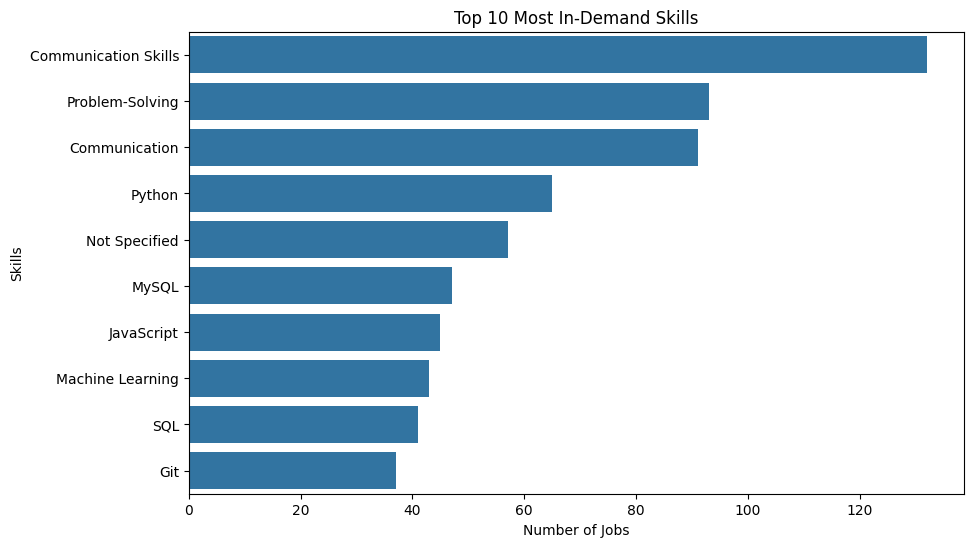

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Skill', data=top_skills_df)
plt.title('Top 10 Most In-Demand Skills')
plt.xlabel('Number of Jobs')
plt.ylabel('Skills')
plt.show()  


# Visualize most frequent skills by city

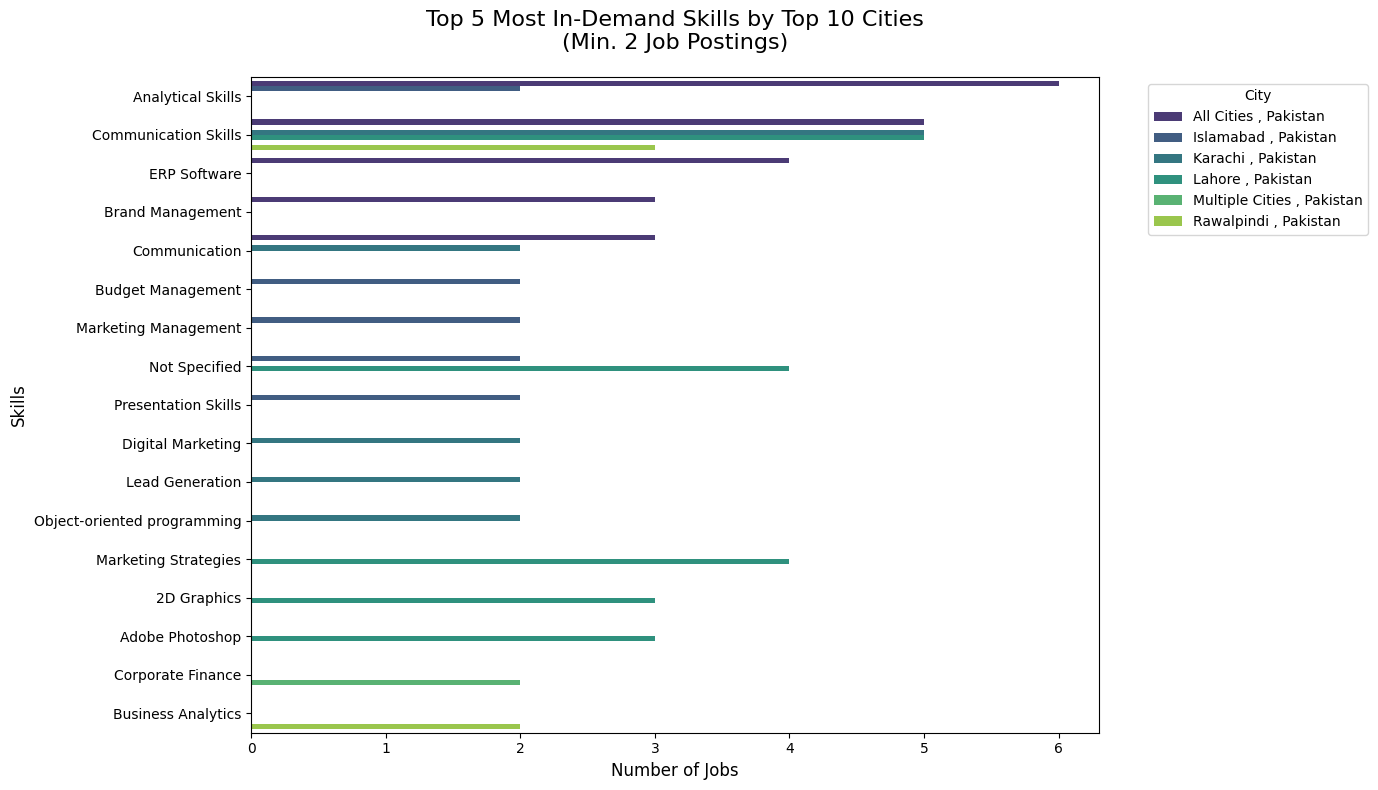

In [56]:

all_skills = required_data['skills'].str.split(',').explode().str.strip().reset_index(drop=True)
skills_df = required_data.copy().reset_index(drop=True)
skills_df['Skill'] = all_skills
skills_by_city = skills_df.groupby(['Location', 'Skill']).size().reset_index(name='Count')
# Sort by Location and Count descending
skills_by_city = skills_by_city.sort_values(['Location', 'Count'], ascending=[True, False])
top_skills_city = skills_by_city.groupby('Location').head(5)
# Remove skills with very low frequency
top_skills_city = top_skills_city[top_skills_city['Count'] >= 2]

# Select only top 10 cities by total job count
city_totals = top_skills_city.groupby('Location')['Count'].sum().sort_values(ascending=False).head(10)
top_skills_city_filtered = top_skills_city[top_skills_city['Location'].isin(city_totals.index)]

# If no data remains, show message
if top_skills_city_filtered.empty:
    print("No skills found with 2 or more jobs. Try removing the Count >= 2 filter.")
else:
    # Step 6: Plot using Seaborn
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='Count',
        y='Skill',
        hue='Location',
        data=top_skills_city_filtered,
        palette='viridis'
    )
    plt.title('Top 5 Most In-Demand Skills by Top 10 Cities\n(Min. 2 Job Postings)', fontsize=16, pad=20)
    plt.xlabel('Number of Jobs', fontsize=12)
    plt.ylabel('Skills', fontsize=12)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

In [58]:
required_data.to_csv("clean_job_data_of_rozee.com.csv")